Data Visualization in Epidemiology -Notebook 1

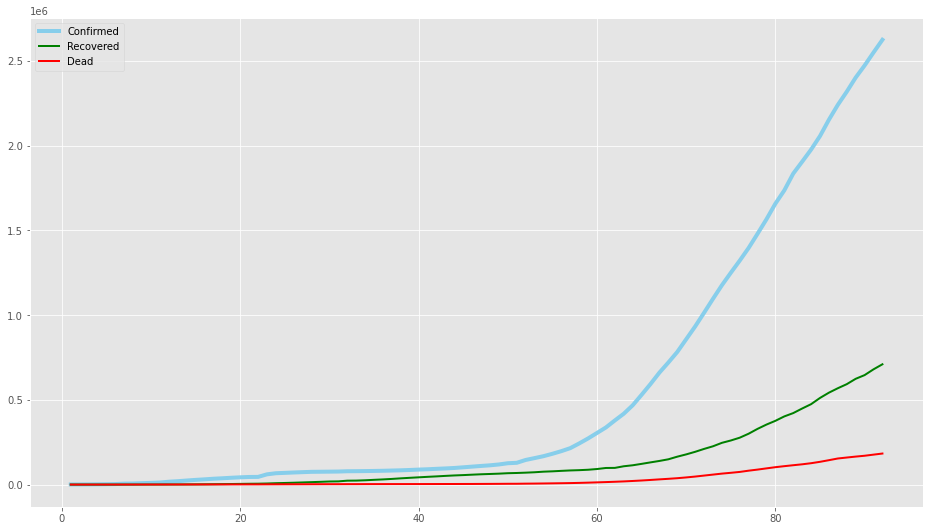

In [0]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
my_data = pd.read_csv("general_overview_world.csv") 
df = pd.DataFrame({'Days': my_data['day'], 'Confirmed': my_data['confirmed'],'Recovered': my_data['recovered'], 'Dead': my_data['dead']})
 
# multiple line plot
plt.plot( 'Days', 'Confirmed', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Days', 'Recovered', data=df, marker='', color='green', linewidth=2)
plt.plot( 'Days', 'Dead', data=df, marker='', color='red', linewidth=2)
plt.legend()
plt.savefig('comparison.png')


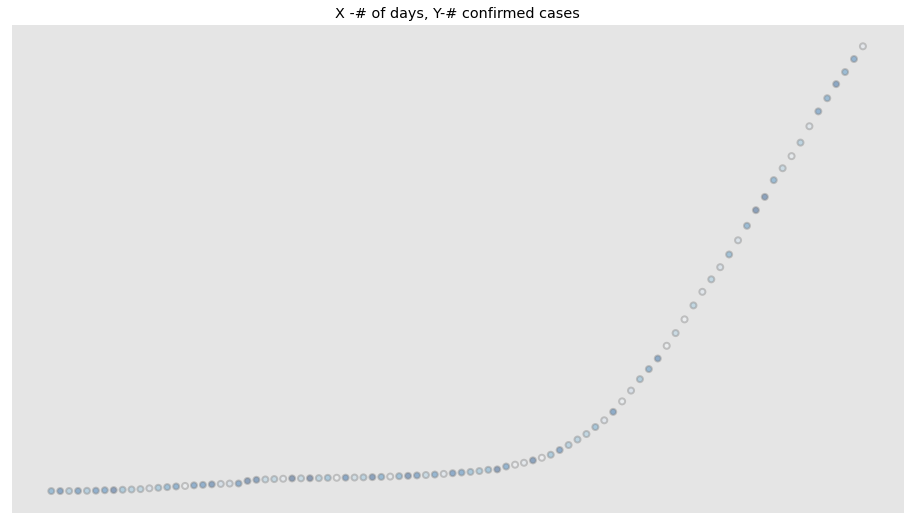

<Figure size 1152x648 with 0 Axes>

In [0]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

my_data = pd.read_csv("general_overview_world.csv") 
z = np.random.rand(92)
z=z+1

day = (my_data['day']).to_numpy()
confirmed = (my_data['confirmed']).to_numpy()

plt.scatter(day,confirmed, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)

# Add titles (main and on axis)
plt.title("X -# of days, Y-# confirmed cases")
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()
plt.savefig('scatterplot.png')


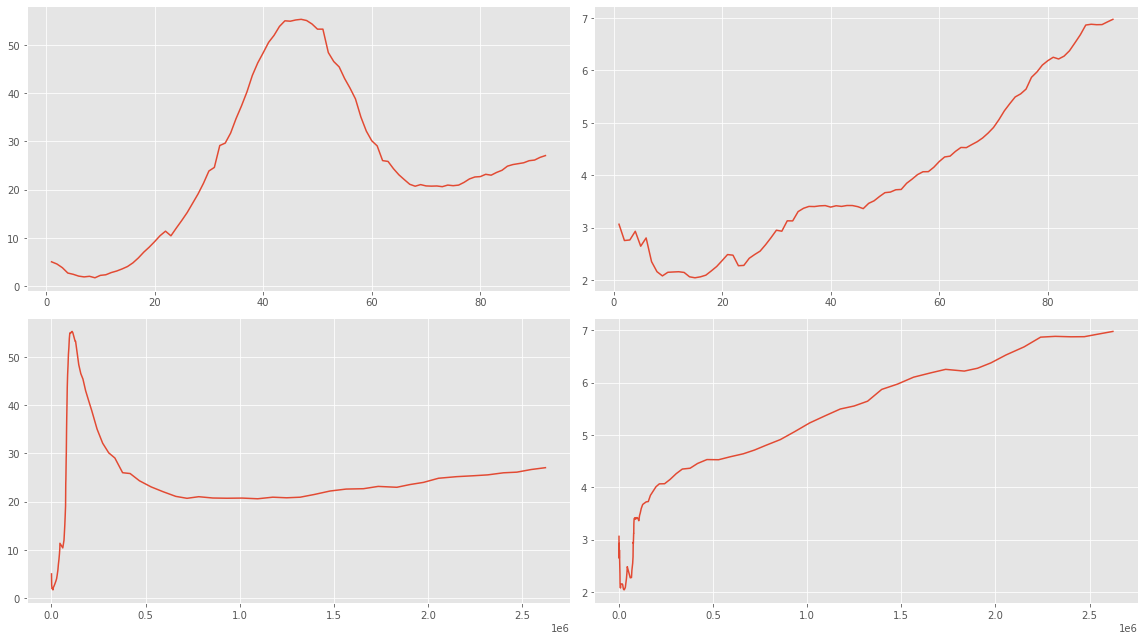

In [0]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

my_data = pd.read_csv("general_overview_world.csv") 

Days = (my_data['day']).to_numpy()
Confirmed = (my_data['confirmed']).to_numpy()
Recovered = (my_data['recovered']).to_numpy()
Dead = (my_data['dead']).to_numpy()
Recovered_r = (my_data['recovered_ratio']).to_numpy()
Dead_r = (my_data['dead_ratio']).to_numpy()

figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(Days,(Recovered/Confirmed)*100)
axes[0, 1].plot(Days,(Dead/Confirmed)*100)
axes[1, 0].plot(Confirmed,(Recovered/Confirmed)*100)
axes[1, 1].plot(Confirmed,(Dead/Confirmed)*100)

figure.tight_layout()
plt.savefig('subplot.png')

coefficient of determination: 0.5906420369825409
intercept: -180839.79560439568
slope: [6795.41887243]


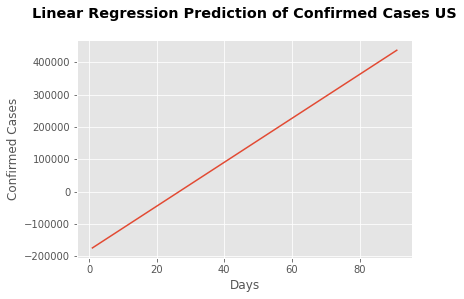

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("confirmed_us.csv") 
x = np.array(data['Day']).reshape((-1,1))
y = np.array(data['Count'])

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(x)
#print('predicted response:', y_pred, sep='\n')

plt.title('Linear Regression Prediction of Confirmed Cases US\n',fontweight='bold')
plt.plot(x, y_pred)
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.savefig('linear_regression.png')


In [0]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

data = pd.read_csv("confirmed_us.csv") 
x = np.array(data['Day']).reshape((-1,1))
y = np.array(data['Count'])

x = sm.add_constant(x)

model = sm.OLS(y, x)

results = model.fit()

print(results.summary())

print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     128.4
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           5.97e-19
Time:                        22:16:39   Log-Likelihood:                -1212.8
No. Observations:                  91   AIC:                             2430.
Df Residuals:                      89   BIC:                             2435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.808e+05   3.18e+04     -5.693      0.0

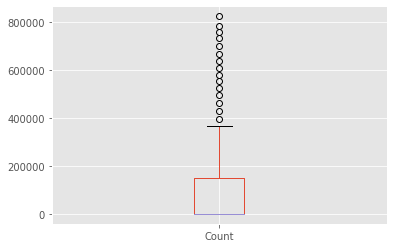

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv("confirmed_us.csv") 

df = pd.DataFrame(data,columns=['Count'])

# df.plot.box(grid='True')

df.plot.box(grid='False')
plt.savefig('boxplot.png')

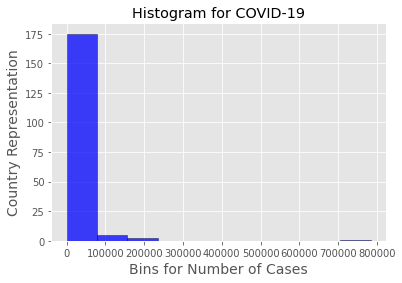

<Figure size 432x288 with 0 Axes>

In [0]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = [1026,584,2718,717,24,23,2941,1339,6547,14795,1436,60,1907,2948,75,6264,39983,18,54,5,
     564,1309,20,40743,138,929,581,119,5,67,122,1163,37657,12,33,10507,83817,3977,160,332,
     662,847,1881,1087,772,6900,7711,712,846,16,4964,10128,3333,218,79,39,1535,24,111,18,
     3868,120,10,402,147065,1042,2245,14,289,622,50,65,57,9,477,1984,1773,18539,6760,83505,
     15652,13713,181228,223,10797,425,1852,281,10674,510,1995,568,19,739,677,99,51,81,1326,
     3558,121,17,5425,69,246,431,7,328,8261,2548,94,33,312,3046,39,9,16,31,33588,1440,10,
     648,665,1225,7156,1410,8418,4467,7,208,16325,6459,9593,20863,6015,8936,47121,147,15,15,
     12,462,4,10484,377,6630,11,43,8014,1173,1335,237,3300,4,200210,304,107,10,14777,27944,
     39,422,254,2792,22,84,114,884,90980,56,5710,7265,125856,535,784326,1627,256,268,449,6,
     1,65,25]
num_bins =10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.75, edgecolor='black')

plt.title('Histogram for COVID-19')
plt.xlabel('Bins for Number of Cases',fontsize=14)
plt.ylabel('Country Representation',fontsize=14)

plt.show()
plt.savefig('histogram.png')

(185, 2)


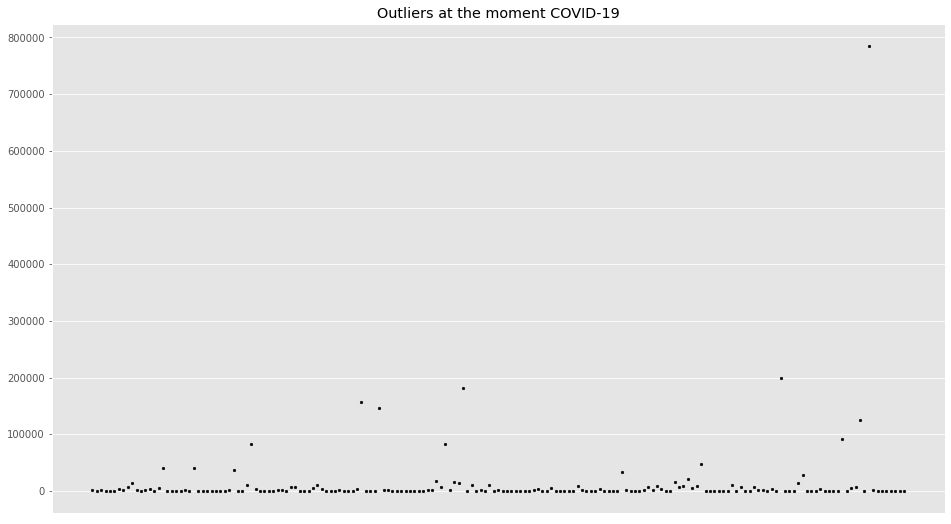

In [0]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_csv('covid_cases.csv')
print(data.shape)
data.head()

# Getting the values and plotting it

f1 = data['Country'].values
f2 = data['Cases'].values
X = np.array(list(zip(f1, f2)))
#plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.scatter(f1, f2, c='black', s=7)
plt.title('Outliers at the moment COVID-19')
plt.savefig('outliers.png')

(185, 2)


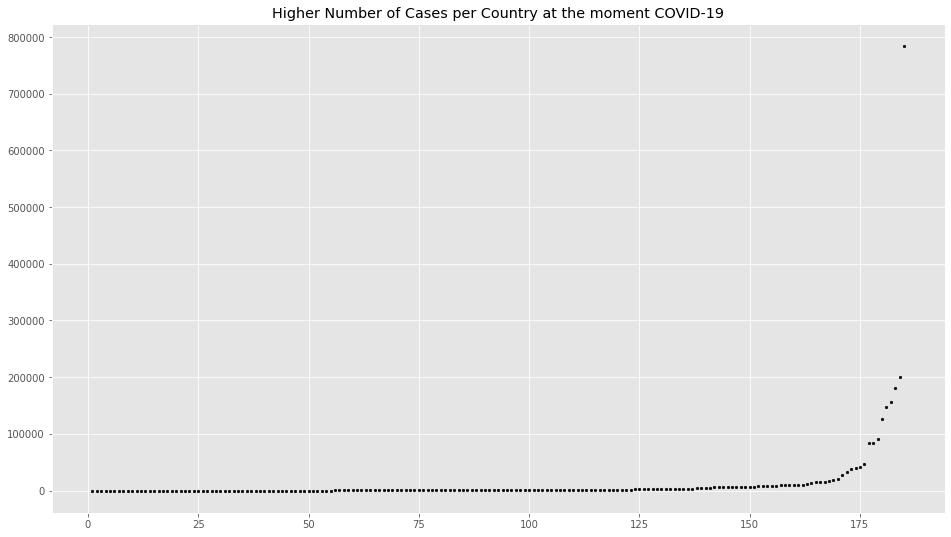

In [0]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_csv('ordered_cases_legend.csv')
print(data.shape)
data.head()

# Getting the values and plotting it

f1 = data['Order'].values
f2 = data['Cases'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
plt.gca().axes.get_xaxis().set_visible(True)

plt.title('Higher Number of Cases per Country at the moment COVID-19')
plt.savefig('orderedbycases.png')

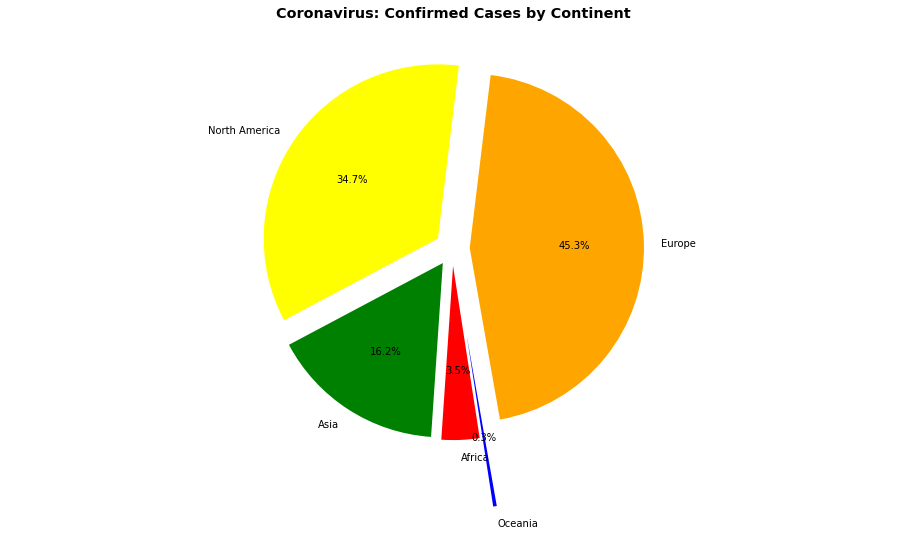

<Figure size 1152x648 with 0 Axes>

In [0]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#Data to plot
labels = ['Europe','North America','Asia','Africa','Oceania']
sizes = [1113096,852247,396876,86521,8169]
colors = ['orange', 'yellow', 'green','red','blue']
explode = [0.1,0.1,0.1,0.1,0.5] #explode all slices

#plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',shadow=False,startangle=1000)
plt.title('Coronavirus: Confirmed Cases by Continent\n',fontweight='bold')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

plt.savefig('casesbycontinent.png')

Working with Geospatial Data

In [0]:
pip install geopandas

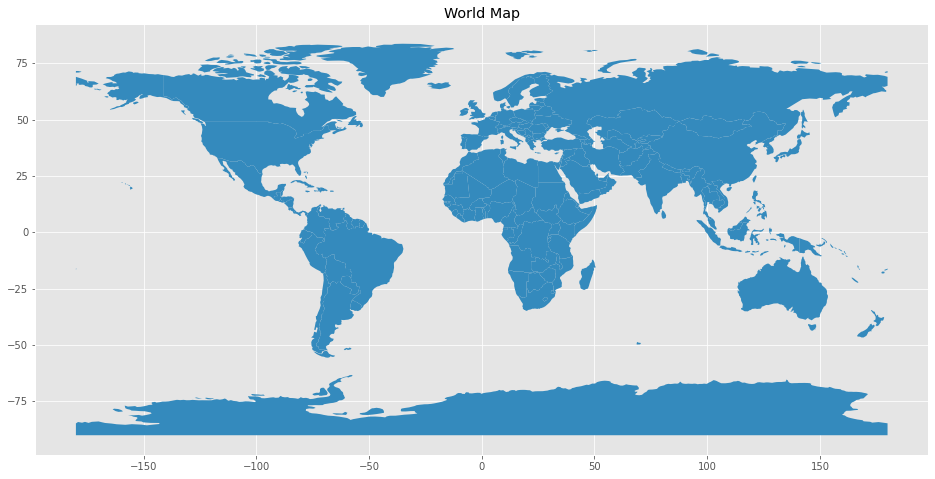

In [0]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.head()
world.plot()

plt.title('World Map')
plt.savefig('world_map.png')

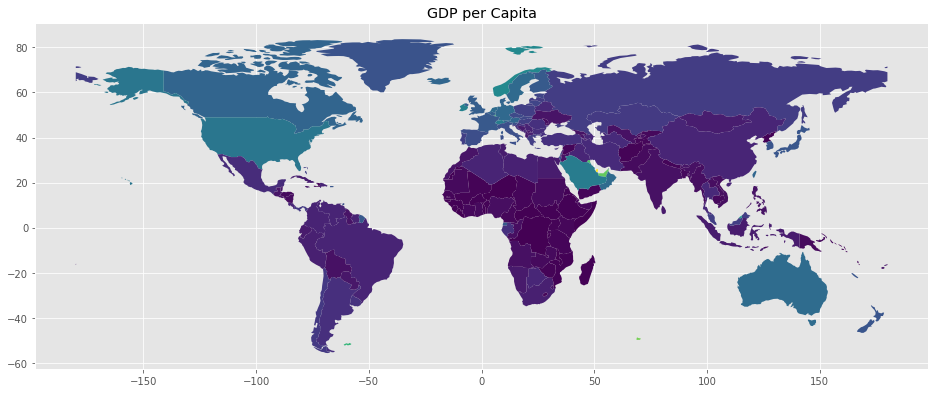

In [0]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap');
plt.title('GDP per Capita')
plt.savefig('gdp_per_capita.png')

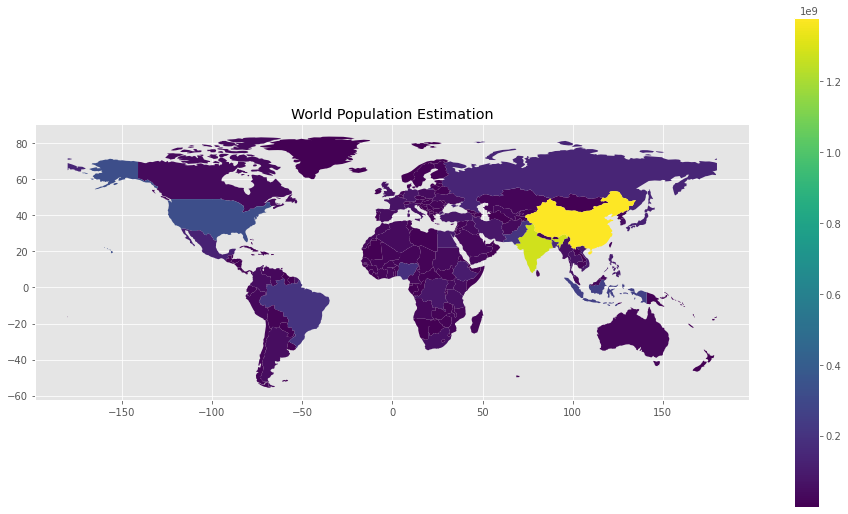

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est', ax=ax, legend=True)
plt.title('World Population Estimation')
plt.savefig('population_estimation.png')

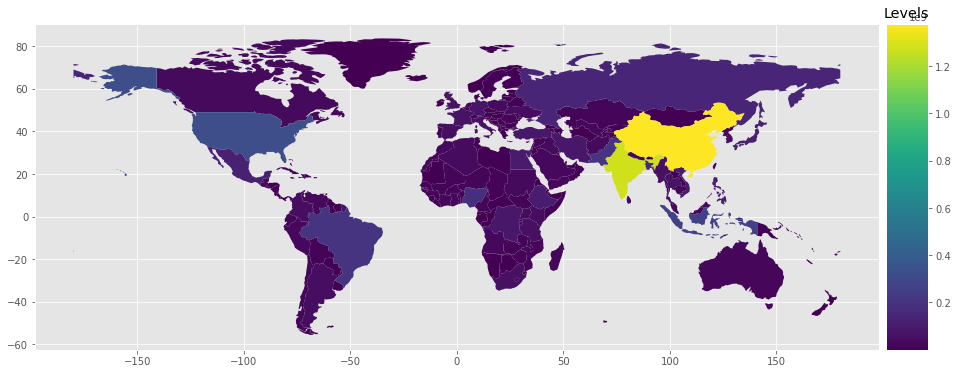

In [0]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='pop_est', ax=ax, legend=True, cax=cax)
plt.title('Levels')
plt.savefig('population_estimation_categories.png')

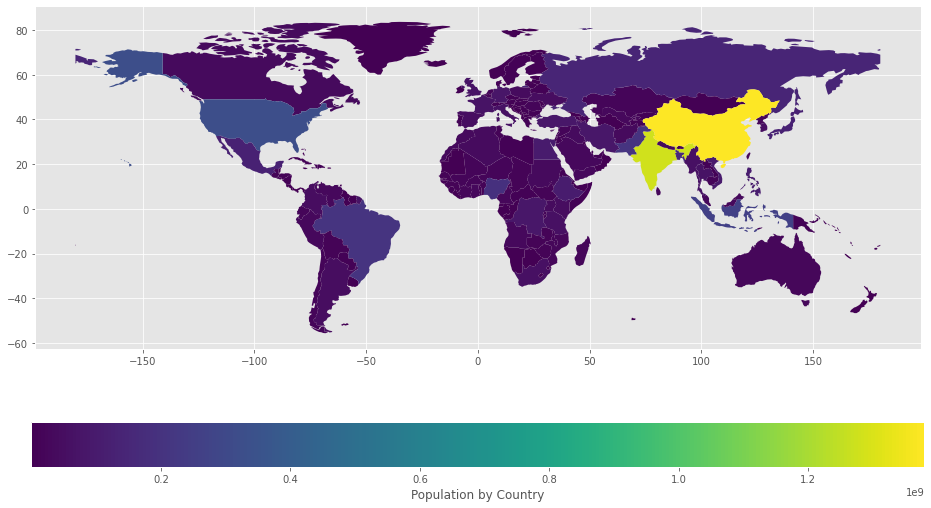

In [0]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est',
               ax=ax,
               legend=True,
               legend_kwds={'label': "Population by Country",
                            'orientation': "horizontal"})

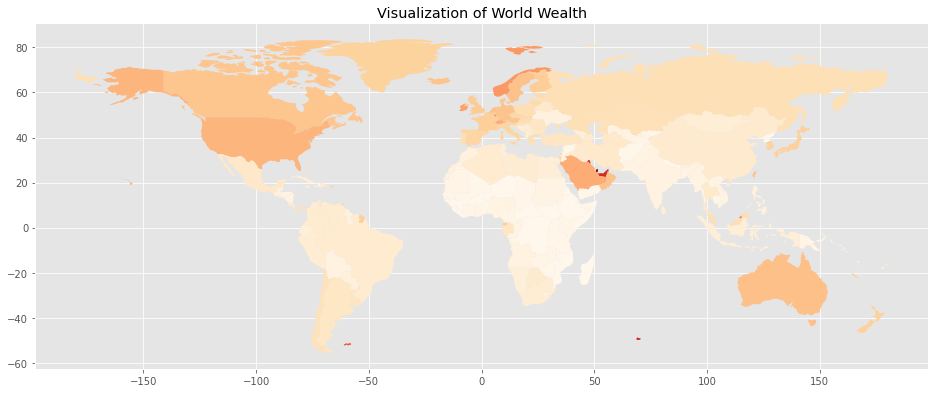

In [0]:
world.plot(column='gdp_per_cap', cmap='OrRd');
plt.title('Visualization of World Wealth')
plt.savefig('world_wealth.png')

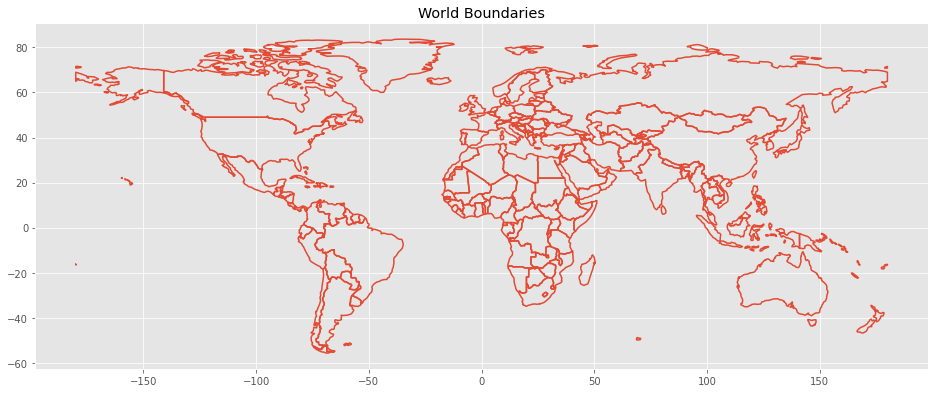

In [0]:
world.boundary.plot();
plt.title('World Boundaries')
plt.savefig('world_boundaries')

In [0]:
pip install pysal

  Using cached https://files.pythonhosted.org/packages/68/04/e9a456867aa2686186f7d1d1fd3c9598ac27a92d08063afa236a1f1fd7e2/pysal-2.2.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/6f/00/bf40b380e9064222868c93ed51d81dd14b1266b16dd5a54e53aaed12caf2/libpysal-4.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/16/f1/c2190bc3a7ef9c83ce0b060b927763352bfc0a55ccea8bb5fcd8975de347/esda-2.2.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/6e/96/c9cac4d3a00dbe682a4031e3775cb7941f35ac9918efc481d4da7a89966d/giddy-2.3.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/74/0f/9ed2d097f29160d0c873f33ffc0b9806c1083e3611acb2143eb66adcf580/inequality-1.0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/57/29/51bf19dc4452c1429f15335574642bfd5cb672ddbacf8a95c69967ff84b1/pointpats-2.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/4d/69/288da08dde201dc250d6dadf6a9ad035e1a5d8b3bdc20b71c2874482d488/segregation-1.2.0-py3

In [0]:
!pip install mapclassify

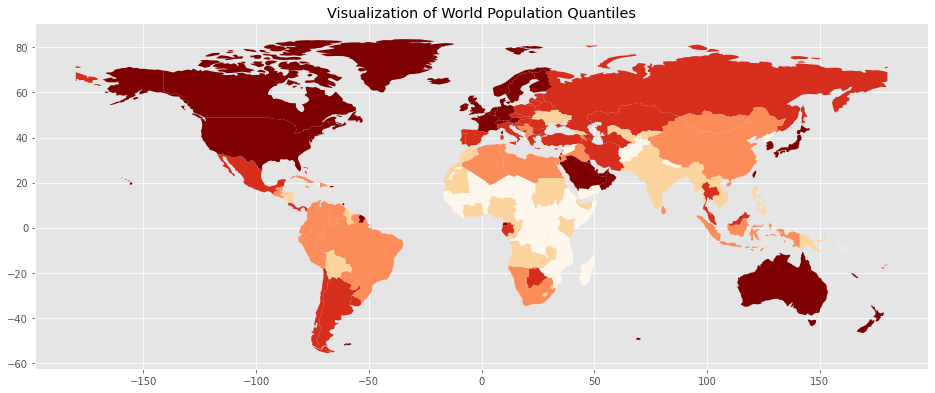

In [0]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')
plt.title('Visualization of World Population Quantiles')
plt.savefig('world_quantiles.png')